In [1]:
import os

BBO_exp_dict = {
    "BBO MBTR": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.01_test_BBOMol_QED/",
    "BBO MBTR QM9": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.02_test_BBOMol_QED_DOE_QM9/",
    "BBO MBTR ChEMBL": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.03_test_BBOMol_QED_DOE_ChEMBL/",
    "BBO SHG": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.04_test_BBOMol_QED_shg/",
    "BBO SHG QM9": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.05_test_BBOMol_QED_DOE_QM9_shg/",
    "BBO SHG ChEMBL": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.06_test_BBOMol_QED_DOE_ChEMBL_shg/",
    "BBO SHG QM9 noise based": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.07_test_BBOMol_QED_DOE_QM9_shg_noise_based/",
    "BBO SHG QM9 calc init pop EI":  os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.08_test_BBOMol_QED_DOE_QM9_shg_init_pop_calc/",
    "BBO SHG QM9 noise based + calc init pop EI": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.09_test_BBOMol_QED_DOE_QM9_shg_noise_based_init_pop_calc/"

}

EvoMol_exp_dict = {
    "EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.11_test_EvoMol_QED/",
    "EvoMol QM9" : os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.12_test_EvoMol_QED_DOE_random_QM9/",
    "EvoMol ChEMBL": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.13_test_EvoMol_QED_DOE_random_ChEMBL/"
}

sub_experiments_names = [str(i) for i in range(1, 11)]



In [2]:
groups = [
    [
        "DOE methane",
        ["BBO MBTR", "BBO SHG", "EvoMol"],
        {},
        [0, 0, 1],
        [None, None, None],
        (0, 1) # y limits
    ],
    [
        "DOE QM9",
        ["BBO MBTR QM9", "BBO SHG QM9", "EvoMol QM9"],
        {},
        [0, 0, 1],
        [None, None, None],
        (0.7, 1) # y limits
    ],
    [
        "DOE ChEMBL",
        ["BBO MBTR ChEMBL", "BBO SHG ChEMBL", "EvoMol ChEMBL"],
        {},
        [0, 0, 1],
        [None, None, None],
        (0.7, 1) # y limits
    ],
    [
        "EI params QM9",
        ["BBO SHG QM9", "BBO SHG QM9 noise based", "BBO SHG QM9 calc init pop EI", "BBO SHG QM9 noise based + calc init pop EI",
         "EvoMol QM9"],
        {},
        [0, 0, 0, 0, 1],
        [None, None, None, None, None],
        (0.7, 1) # y limits
    ],
]

In [3]:
from bbomol.postprocessing.postprocessing import load_complete_input_results

results_dict = load_complete_input_results(BBO_exp_dict, EvoMol_exp_dict, sub_experiments_names, 
                                           include_dataset_init_step=True)


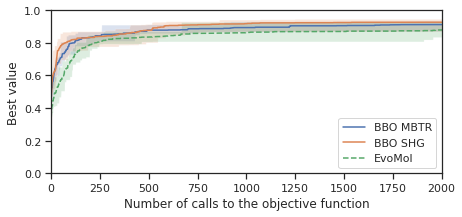

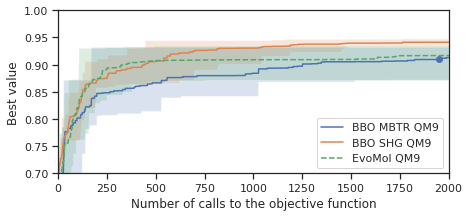

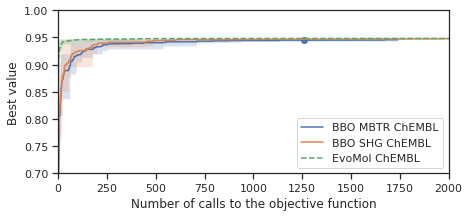

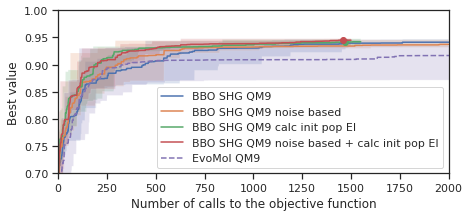

In [4]:
from bbomol.postprocessing import plot
plot.figsize = (7, 3)
from IPython.display import display, HTML


for g in groups:
    
    display(HTML("<h3>" + g[0] +"</h3>"))
    
    plot.plot_best_so_far(results_dict, metric="both", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                          classes_dashes=g[3], classes_markers=g[4], ylim=g[5], xlim=(0, 2000),
                          plot_last_common_data_all_runs=True)